# Causality Workshop 2025 - PNNL TechFest
## NOCAP introduction and Tutorial 
### August George and Jeremy Zucker

# Introduction: Causality for Bioengineering

* Engineer biological systems with novel capabilities (biofactories, sensors, therapeutics)

* Fill gaps in biological "parts list" and component functions

* Develop better mechanistic models despite messy data

* Leverage emerging experiments and causal analysis to advance the field




# Perturb-Seq and NOCAP

* Perturb-Seq: single cell RNAseq with CRISPR genetic perturbations

* NOCAP: Network Optimization and Causal Analysis of Perturb-seq

* A toolkit to study perturb-seq data and gene regulatory networks (GRN) using causality

* GRN: nodes represent gene expression, edges represent activation or attenuation


# Getting Started - Making a Model

* (Linear) Structural Causal Model: $X\rightarrow Y$; $Y = βX + ε$
  * Gene expression of Y, Gene expression of gene X, edge weight β, noise ε
  * Good first order approximation, but has limitations


In [ ]:
# load modules for tutorial
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
from IPython.display import display

import nocap

In [18]:
# loading E. coli tyrR subnetwork
tyrR_DAG = nx.read_gml("tyrR_filtered.gml")
tyrR_SCM = nocap.scm.generate_lscm_from_dag(tyrR_DAG)
display(f"Number of nodes in the DAG: {tyrR_DAG.number_of_nodes()}")
display(f"Number of edges in the DAG: {tyrR_DAG.number_of_edges()}")

'Number of nodes in the DAG: 26'

'Number of edges in the DAG: 63'

# Inspecting the Model
* Visualizing the causal graph and model equations

In [19]:
nocap.scm.plot_interactive_lscm_graph(tyrR_SCM)

In [20]:
display(nocap.scm.convert_to_latex(tyrR_SCM))

'$$cra = \\epsilon_{cra}$$\n $$rpoD = \\epsilon_{rpoD}$$\n $$glaR = \\epsilon_{glaR}$$\n $$cpxR = \\beta_{rpoD ->cpxR} rpoD + \\epsilon_{cpxR}$$\n $$fnr = \\beta_{rpoD ->fnr} rpoD + \\epsilon_{fnr}$$\n $$hupB = \\beta_{rpoD ->hupB} rpoD + \\epsilon_{hupB}$$\n $$ihfB = \\beta_{rpoD ->ihfB} rpoD + \\epsilon_{ihfB}$$\n $$lrp = \\beta_{rpoD ->lrp} rpoD + \\epsilon_{lrp}$$\n $$trpR = \\beta_{rpoD ->trpR} rpoD + \\epsilon_{trpR}$$\n $$soxR = \\beta_{fnr ->soxR} fnr + \\beta_{rpoD ->soxR} rpoD + \\epsilon_{soxR}$$\n $$ihfA = \\beta_{ihfB ->ihfA} ihfB + \\epsilon_{ihfA}$$\n $$argR = \\beta_{lrp ->argR} lrp + \\beta_{rpoD ->argR} rpoD + \\epsilon_{argR}$$\n $$nac = \\beta_{fnr ->nac} fnr + \\beta_{lrp ->nac} lrp + \\epsilon_{nac}$$\n $$tyrR = \\beta_{lrp ->tyrR} lrp + \\beta_{rpoD ->tyrR} rpoD + \\epsilon_{tyrR}$$\n $$hupA = \\beta_{nac ->hupA} nac + \\epsilon_{hupA}$$\n $$aroF = \\beta_{nac ->aroF} nac + \\beta_{rpoD ->aroF} rpoD + \\beta_{soxR ->aroF} soxR + \\beta_{tyrR ->aroF} tyrR + \\epsi

$$cra = \epsilon_{cra}$$
 $$rpoD = \epsilon_{rpoD}$$
 $$glaR = \epsilon_{glaR}$$
 $$cpxR = \beta_{rpoD ->cpxR} rpoD + \epsilon_{cpxR}$$
 $$fnr = \beta_{rpoD ->fnr} rpoD + \epsilon_{fnr}$$
 $$hupB = \beta_{rpoD ->hupB} rpoD + \epsilon_{hupB}$$
 $$ihfB = \beta_{rpoD ->ihfB} rpoD + \epsilon_{ihfB}$$
 $$lrp = \beta_{rpoD ->lrp} rpoD + \epsilon_{lrp}$$
 $$trpR = \beta_{rpoD ->trpR} rpoD + \epsilon_{trpR}$$
 $$soxR = \beta_{fnr ->soxR} fnr + \beta_{rpoD ->soxR} rpoD + \epsilon_{soxR}$$
 $$ihfA = \beta_{ihfB ->ihfA} ihfB + \epsilon_{ihfA}$$
 $$argR = \beta_{lrp ->argR} lrp + \beta_{rpoD ->argR} rpoD + \epsilon_{argR}$$
 $$nac = \beta_{fnr ->nac} fnr + \beta_{lrp ->nac} lrp + \epsilon_{nac}$$
 $$tyrR = \beta_{lrp ->tyrR} lrp + \beta_{rpoD ->tyrR} rpoD + \epsilon_{tyrR}$$
 $$hupA = \beta_{nac ->hupA} nac + \epsilon_{hupA}$$
 $$aroF = \beta_{nac ->aroF} nac + \beta_{rpoD ->aroF} rpoD + \beta_{soxR ->aroF} soxR + \beta_{tyrR ->aroF} tyrR + \epsilon_{aroF}$$
 $$aroG = \beta_{cpxR ->aroG} cpxR + \beta_{lrp ->aroG} lrp + \beta_{rpoD ->aroG} rpoD + \beta_{tyrR ->aroG} tyrR + \epsilon_{aroG}$$
 $$aroL = \beta_{rpoD ->aroL} rpoD + \beta_{trpR ->aroL} trpR + \beta_{tyrR ->aroL} tyrR + \epsilon_{aroL}$$
 $$aroM = \beta_{rpoD ->aroM} rpoD + \beta_{trpR ->aroM} trpR + \beta_{tyrR ->aroM} tyrR + \epsilon_{aroM}$$
 $$aroP = argR \beta_{argR ->aroP} + \beta_{cra ->aroP} cra + \beta_{fnr ->aroP} fnr + \beta_{glaR ->aroP} glaR + \beta_{rpoD ->aroP} rpoD + \beta_{tyrR ->aroP} tyrR + \epsilon_{aroP}$$
 $$folA = \beta_{ihfA ->folA} ihfA + \beta_{ihfB ->folA} ihfB + \beta_{rpoD ->folA} rpoD + \beta_{tyrR ->folA} tyrR + \epsilon_{folA}$$
 $$tyrA = \beta_{rpoD ->tyrA} rpoD + \beta_{soxR ->tyrA} soxR + \beta_{tyrR ->tyrA} tyrR + \epsilon_{tyrA}$$
 $$tyrB = \beta_{rpoD ->tyrB} rpoD + \beta_{tyrR ->tyrB} tyrR + \epsilon_{tyrB}$$
 $$yaiA = \beta_{rpoD ->yaiA} rpoD + \beta_{trpR ->yaiA} trpR + \beta_{tyrR ->yaiA} tyrR + \epsilon_{yaiA}$$
 $$mtr = \beta_{hupA ->mtr} hupA + \beta_{hupB ->mtr} hupB + \beta_{ihfA ->mtr} ihfA + \beta_{ihfB ->mtr} ihfB + \beta_{lrp ->mtr} lrp + \beta_{rpoD ->mtr} rpoD + \beta_{trpR ->mtr} trpR + \beta_{tyrR ->mtr} tyrR + \epsilon_{mtr}$$
 $$tyrP = \beta_{hupA ->tyrP} hupA + \beta_{hupB ->tyrP} hupB + \beta_{ihfA ->tyrP} ihfA + \beta_{ihfB ->tyrP} ihfB + \beta_{lrp ->tyrP} lrp + \beta_{rpoD ->tyrP} rpoD + \beta_{tyrR ->tyrP} tyrR + \epsilon_{tyrP}$$

# Model Simulation
* Generating synthetic perturb-seq data

,cra,rpoD,glaR,cpxR,fnr,hupB,ihfB,lrp,trpR,soxR,...,aroG,aroL,aroM,aroP,folA,tyrA,tyrB,yaiA,mtr,tyrP
0,1.21295,0.420442,0.643161,0.000000,1.636640,0.000000,1.464146,0.815639,1.071461,1.500660,...,1.263798,1.785239,1.005551,2.754765,1.316453,2.405622,1.238918,0.087892,3.487470,4.379042
1,0.00000,0.655949,0.000000,2.524947,0.342678,2.262205,1.967148,0.923020,0.000000,0.000000,...,5.061959,0.000000,1.394912,3.123305,2.319632,0.000000,0.339981,2.624526,6.294368,3.842907
2,0.00000,0.232924,0.000000,0.767366,0.000000,1.722116,0.699402,0.568767,1.569992,0.295271,...,2.219619,0.804494,0.772275,0.000000,0.160935,1.283422,1.623451,1.250337,3.748048,3.898414
3,0.41107,0.688755,0.000000,1.658481,0.096426,2.532232,0.000000,0.003512,1.393576,1.524759,...,3.500864,2.382152,2.814337,2.431585,0.000000,2.977336,2.381276,2.358245,4.709963,2.947774
4,0.00000,0.000000,0.000000,3.082056,0.000000,0.000000,1.904908,0.172666,0.000000,0.000000,...,2.887442,0.000000,0.000000,0.000000,0.000000,0.000000,0.406178,0.663208,0.000000,0.920871


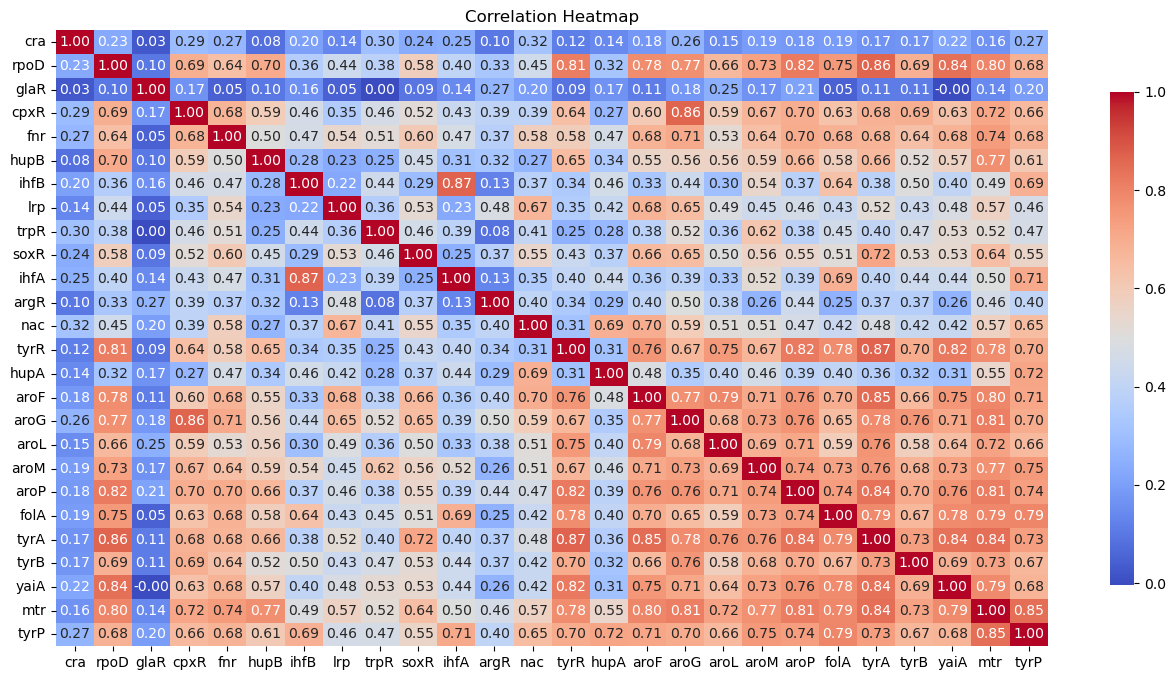

In [21]:
# Simulate data from the model
simulated_data = nocap.simulate_data_with_outliers(tyrR_DAG, num_samples=1000)
display(simulated_data.head())

# Plot the heatmap
corr_matrix = simulated_data.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={"shrink": 0.8})
plt.title("Correlation Heatmap")
plt.show()

# Model Calibration
* Learning model parameters from data
* Conditional probability distributions for each node are learned

In [ ]:
# run inverse modeling (parameter estimation)
fitted_model = nocap.scm.fit_model(tyrR_DAG, simulated_data, backend="pgmpy", method="mle")
display(fitted_model.cpds)

[<LinearGaussianCPD: P(soxR | fnr, rpoD) = N(0.344*fnr + 0.498*rpoD + 0.52; 1.032) at 0x31b175e90,
 <LinearGaussianCPD: P(mtr | lrp, ihfA, ihfB, trpR, rpoD, hupA, tyrR, hupB) = N(0.834*lrp + -0.017*ihfA + 0.219*ihfB + 0.627*trpR + 0.295*rpoD + 0.368*hupA + 0.915*tyrR + 1.2*hupB + -0.277; 2.113) at 0x310bc1490,
 <LinearGaussianCPD: P(lrp | rpoD) = N(0.577*rpoD + 0.252; 1.095) at 0x31b003a90,
 <LinearGaussianCPD: P(tyrA | soxR, rpoD, tyrR) = N(0.931*soxR + 0.862*rpoD + 1.305*tyrR + 0.07; 1.051) at 0x31af9f8d0,
 <LinearGaussianCPD: P(yaiA | trpR, rpoD, tyrR) = N(0.498*trpR + 1.005*rpoD + 0.756*tyrR + 0.026; 0.996) at 0x31b05f050,
 <LinearGaussianCPD: P(ihfA | ihfB) = N(1.036*ihfB + 0.245; 0.824) at 0x31af6f2d0,
 <LinearGaussianCPD: P(aroF | soxR, rpoD, nac, tyrR) = N(0.314*soxR + 0.395*rpoD + 0.638*nac + 0.821*tyrR + -0.256; 1.112) at 0x31af84d50,
 <LinearGaussianCPD: P(aroG | lrp, rpoD, tyrR, cpxR) = N(1.065*lrp + 0.884*rpoD + -0.06*tyrR + 1.173*cpxR + -0.375; 1.232) at 0x31b175ed0,
 <Li

# Investigating Intervention Effects
* Average Treatment Effect (ATE): 
    * Genetic activation of gene X has what ATE on gene Y?


In [ ]:
ate = nocap.scm.estimate_ate(tyrR_DAG, simulated_data, "tyrR", "tyrA")
display(ate)

1.1974768079898295

# Next Steps:

NOCAP is under active development:
* Analysis of dynamic time series data and interventions
* Causal model discovery and repair
* Robust probabilistic models with noise
* Additional backends

If you are interested in causality for single cell biology, please reach out!
* August George: august.george@pnnl.gov 
* Jeremy Zucker: jeremy.zucker@pnnl.gov 

GitHub: https://github.com/CRISPR-CARB/nocap 



# Thanks

NOCAP Team
* Mridula Gupta
* Yichao Han
* Narmadha Mohankumar
* Jeremy Zucker
* Alex Beliaev

Causality Workshop Team
* Shant Mahserejian
* Sabina Altus

Funding:
* J.Z. and A.G. were supported in part by award number DE-SC0023091 under the DOE Biosystems Design program.
